In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
import seaborn as sns
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [25]:
tips=sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [26]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [27]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [28]:
tips.isnull()

total_bill    tip    sex  smoker    day   time   size
0         False  False  False   False  False  False  False
1         False  False  False   False  False  False  False
2         False  False  False   False  False  False  False
3         False  False  False   False  False  False  False
4         False  False  False   False  False  False  False
..          ...    ...    ...     ...    ...    ...    ...
239       False  False  False   False  False  False  False
240       False  False  False   False  False  False  False
241       False  False  False   False  False  False  False
242       False  False  False   False  False  False  False
243       False  False  False   False  False  False  False

[244 rows x 7 columns]

In [29]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: xlabel='total_bill', ylabel='tip'>

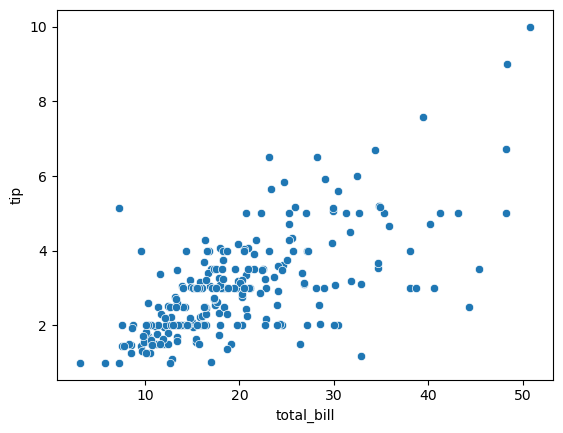

In [30]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

<Axes: xlabel='day', ylabel='tip'>

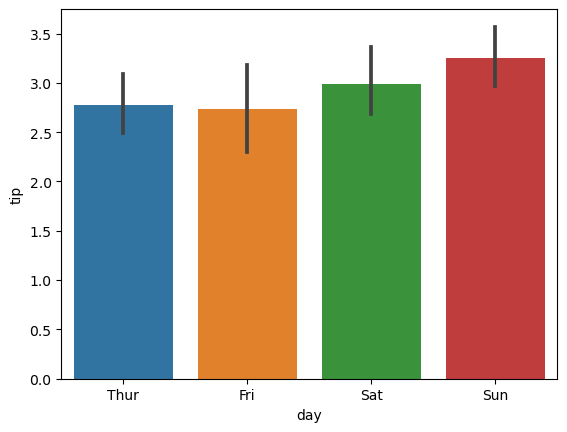

In [31]:
sns.barplot(x='day',y='tip',data=tips)

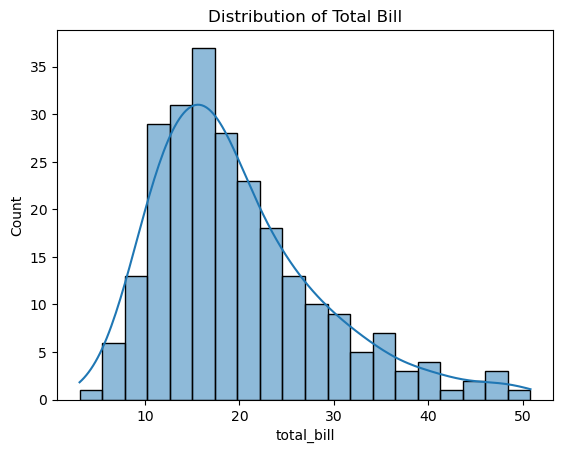

In [32]:
sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.title('Distribution of Total Bill')
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_15488\4284518379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = tips.corr()


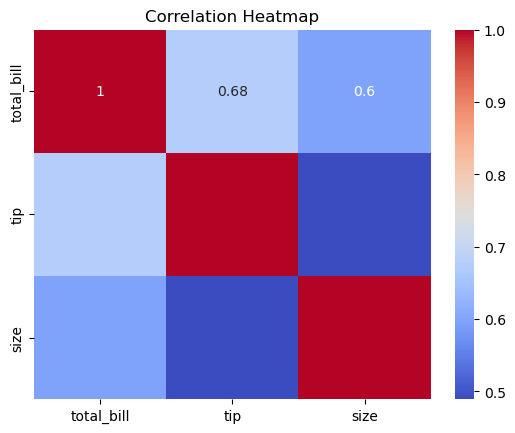

In [33]:
correlation = tips.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
X = tips[['total_bill']] 
y = tips['tip']           


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()       # Create the model
model.fit(X_train, y_train)      # Train the model


LinearRegression()

In [44]:
bill = float(input("Enter the total bill amount in $: "))  # User input
predicted_tip = model.predict([[bill]])              # Predict tip
print(f"The predicted tip for a bill of {bill} is: ${predicted_tip[0]:.2f}")


The predicted tip for a bill of 100.0 is: $11.62


c:\Users\ujwal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model Coefficient: 0.10696370685268665
Model Intercept: 0.9252355585570546


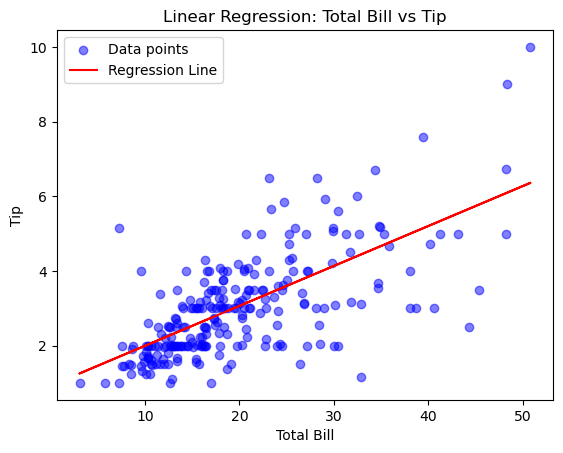

In [45]:
print("Model Coefficient:", model.coef_[0]) 
print("Model Intercept:", model.intercept_)  
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.title('Linear Regression: Total Bill vs Tip')
plt.show()


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)                       
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.57
Root Mean Squared Error (RMSE): 0.75
